In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [5]:
data_headers = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv('D:\Документы/УЧЕБА/МАГА/1 семестр/Демидова/3_4/glass.data', names=data_headers)

In [6]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Часть A 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], 
                                                    data.iloc[:,-1],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=data.iloc[:,-1],
                                                    random_state=322)

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
from sklearn.svm import SVC

In [10]:
svm = SVC()

In [11]:
svm.fit(X_train, y_train)

SVC()

In [12]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

## Тренировочная выборка 

In [13]:
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train, y_train_pred, average='weighted')))

Accuracy: 0.785234899328859
Recall: 0.785234899328859
Precision: 0.7552726613129298


## Тестовая выборка 

In [14]:
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.7384615384615385
Recall: 0.7384615384615385
Precision: 0.7084516765285997


## Опорные вектора

In [15]:
print("Support Vectors")
print(svm.support_vectors_)

print("Index of support vectors")
print(svm.support_)

print("Number of support vectors for each class")
print(svm.n_support_)

Support Vectors
[[-0.28163933  0.57422217  0.65168687 ... -0.78596614 -0.35749434
  -0.56175786]
 [-0.21151087 -0.37604348  0.5759018  ... -0.35382978 -0.35749434
  -0.56175786]
 [-1.94642798 -0.48162855  0.5621227  ... -0.44549507 -0.35749434
   2.66154596]
 ...
 [ 0.64527596  1.12561088 -1.82855179 ... -0.38656738  3.02059217
  -0.56175786]
 [-1.05305239  2.05241318 -1.82855179 ... -0.45204259  0.94018523
  -0.56175786]
 [-0.70241009  0.93790409 -1.82855179 ...  0.00628386  0.4664292
   0.37404002]]
Index of support vectors
[  1   2   3   5   7  11  16  18  20  31  33  39  41  43  46  50  53  54
  59  61  63  65  66  80  84  85  91  93  94  95  96  98  99 106 108 114
 121 132 134 135 138 142 145 146   0  10  15  17  19  21  24  25  26  32
  38  42  45  47  51  56  58  60  69  70  71  72  73  75  76  77  78  79
  81  87  88 102 104 105 107 113 116 117 118 124 126 129 130 131 141 147
   4  22  29  68  74  89  92 101 110 123 133 143   8  36  49  67 100 111
 120 125 140   6  28  40  44  

## Перебор по сетке

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_params = {
    'kernel':('linear', 'rbf','poly','sigmoid'),
    'C':[1.0,2.0,3.0,10.0],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001]
}

gs = GridSearchCV(SVC(),
                 grid_params,
                 verbose=1,
                 cv=3,
                 n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [18]:
print("Grid search best score: ")
print(gs_results.best_score_)
print("Grid search best parameters: ")
print(gs_results.best_params_)

Grid search best score: 
0.7112925170068026
Grid search best parameters: 
{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}


## Визуализация данных

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns

In [20]:
tsne_train = TSNE(init='random', perplexity=10).fit_transform(X_train)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
df_train = pd.DataFrame()
df_train["y"] = y_train
df_train["comp-1"] = tsne_train[:,0]
df_train["comp-2"] = tsne_train[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

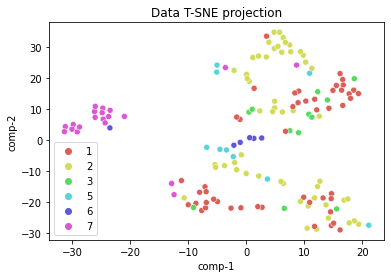

In [42]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_train).set(title="Data T-SNE projection") 

In [40]:
5 in y_train

False

In [26]:
df_train_pred = pd.DataFrame()
df_train_pred["y"] = y_train_pred
df_train_pred["comp-1"] = tsne_train[:,0]
df_train_pred["comp-2"] = tsne_train[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

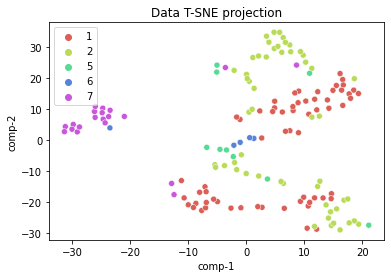

In [29]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train_pred.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df_train_pred).set(title="Data T-SNE projection") 

In [43]:
tsne_test = TSNE(init='random', perplexity=10).fit_transform(X_test)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [44]:
df_test = pd.DataFrame()
df_test["y"] = y_test
df_test["comp-1"] = tsne_test[:,0]
df_test["comp-2"] = tsne_test[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

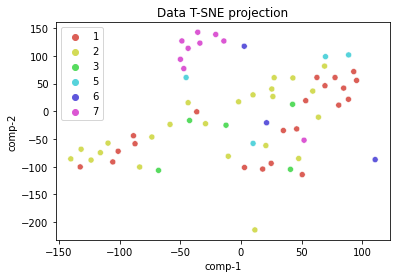

In [45]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_test).set(title="Data T-SNE projection") 

In [46]:
df_test_pred = pd.DataFrame()
df_test_pred["y"] = y_test_pred
df_test_pred["comp-1"] = tsne_test[:,0]
df_test_pred["comp-2"] = tsne_test[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

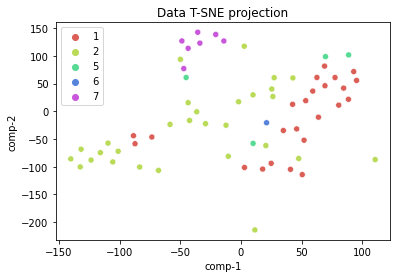

In [49]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test_pred.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df_test_pred).set(title="Data T-SNE projection") 

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


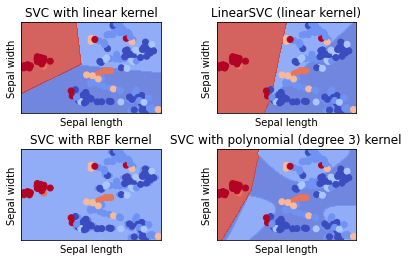

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
X = np.array(df_train.iloc[:,1:])  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = np.array(y_train)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# Часть B

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

## Тренировочная выборка 

In [55]:
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train, y_train_pred, average='weighted')))

Accuracy: 0.7651006711409396
Recall: 0.7651006711409396
Precision: 0.7305010984541186


## Тестовая выборка 

In [56]:
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.6461538461538462
Recall: 0.6461538461538462
Precision: 0.625437621202327


## Перебор по сетке

In [57]:
grid_params = {
    'n_neighbors' : [3,5,7,9,21],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

gs = GridSearchCV(KNeighborsClassifier(),
                 grid_params,
                 verbose=1,
                 cv=3,
                 n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [59]:
print("Grid search best score: ")
print(gs_results.best_score_)
print("Grid search best parameters: ")
print(gs_results.best_params_)

Grid search best score: 
0.7448979591836734
Grid search best parameters: 
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [60]:
y_pred = gs_results.predict(X_test)

In [61]:
accuracy_score(y_pred, y_test)

0.6461538461538462

In [62]:
tsne_train = TSNE(init='random', perplexity=10).fit_transform(X_train)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [63]:
df_train = pd.DataFrame()
df_train["y"] = y_train
df_train["comp-1"] = tsne_train[:,0]
df_train["comp-2"] = tsne_train[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

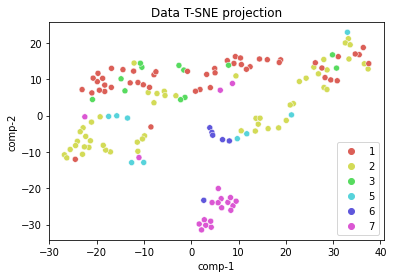

In [64]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_train).set(title="Data T-SNE projection") 

In [65]:
3 in y_train_pred 

False

In [66]:
df_train_pred = pd.DataFrame()
df_train_pred["y"] = y_train_pred
df_train_pred["comp-1"] = tsne_train[:,0]
df_train_pred["comp-2"] = tsne_train[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

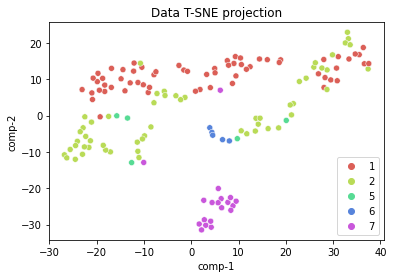

In [67]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train_pred.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df_train_pred).set(title="Data T-SNE projection") 

In [68]:
tsne_test = TSNE(init='random', perplexity=10).fit_transform(X_test)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [69]:
df_test = pd.DataFrame()
df_test["y"] = y_test
df_test["comp-1"] = tsne_test[:,0]
df_test["comp-2"] = tsne_test[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

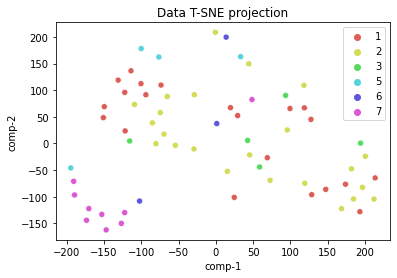

In [70]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_test).set(title="Data T-SNE projection") 

In [71]:
df_test_pred = pd.DataFrame()
df_test_pred["y"] = y_test_pred
df_test_pred["comp-1"] = tsne_test[:,0]
df_test_pred["comp-2"] = tsne_test[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

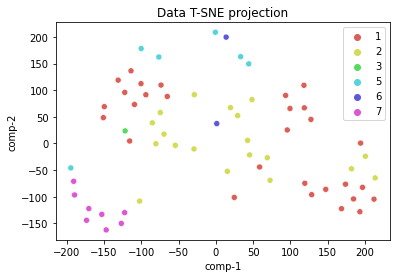

In [72]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test_pred.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_test_pred).set(title="Data T-SNE projection") 

# Часть C

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()

In [75]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

## Обучающая выборка

In [77]:
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train, y_train_pred, average='weighted')))

Accuracy: 0.7651006711409396
Recall: 0.7651006711409396
Precision: 0.7305010984541186


## Тестовая выборка

In [78]:
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.6461538461538462
Recall: 0.6461538461538462
Precision: 0.625437621202327


## Перебор по сетке

In [83]:
grid_params = {
    'n_estimators' : [10,50,100,300,500],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' : [True, False]
}

gs = GridSearchCV(RandomForestClassifier(),
                 grid_params,
                 verbose=1,
                 cv=3,
                 n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [84]:
print("Grid search best score: ")
print(gs_results.best_score_)
print("Grid search best parameters: ")
print(gs_results.best_params_)

Grid search best score: 
0.7718367346938776
Grid search best parameters: 
{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [85]:
y_pred = gs_results.predict(X_test)

In [86]:
accuracy_score(y_pred, y_test)

0.8

In [87]:
tsne_train = TSNE(init='random', perplexity=10).fit_transform(X_train)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [88]:
df_train = pd.DataFrame()
df_train["y"] = y_train
df_train["comp-1"] = tsne_train[:,0]
df_train["comp-2"] = tsne_train[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

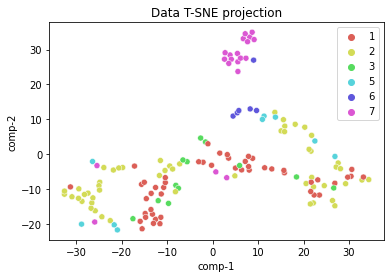

In [89]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_train).set(title="Data T-SNE projection") 

In [90]:
df_train_pred = pd.DataFrame()
df_train_pred["y"] = y_train_pred
df_train_pred["comp-1"] = tsne_train[:,0]
df_train_pred["comp-2"] = tsne_train[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

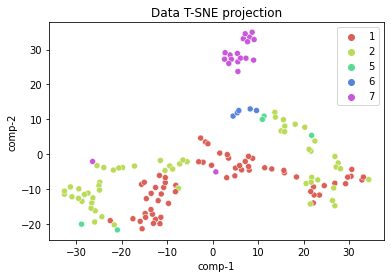

In [93]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train_pred.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df_train_pred).set(title="Data T-SNE projection") 

In [94]:
tsne_test = TSNE(init='random', perplexity=10).fit_transform(X_test)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [95]:
df_test = pd.DataFrame()
df_test["y"] = y_test
df_test["comp-1"] = tsne_test[:,0]
df_test["comp-2"] = tsne_test[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

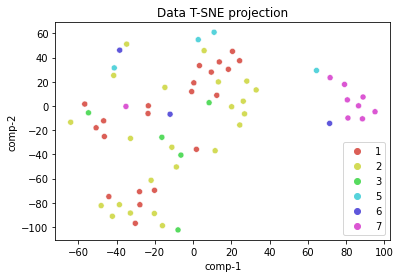

In [96]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_test).set(title="Data T-SNE projection") 

In [97]:
df_test_pred = pd.DataFrame()
df_test_pred["y"] = y_test_pred
df_test_pred["comp-1"] = tsne_test[:,0]
df_test_pred["comp-2"] = tsne_test[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

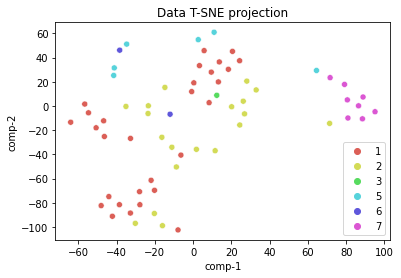

In [98]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test_pred.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_test_pred).set(title="Data T-SNE projection") 